<a href="https://colab.research.google.com/github/Fin-N1049/ImageAndVideoProcessingLab/blob/main/questionSet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving boat.jpeg to boat (3).jpeg
Saving tiger.jpg to tiger (1).jpg
Uploaded files: ['boat (3).jpeg', 'tiger (1).jpg']


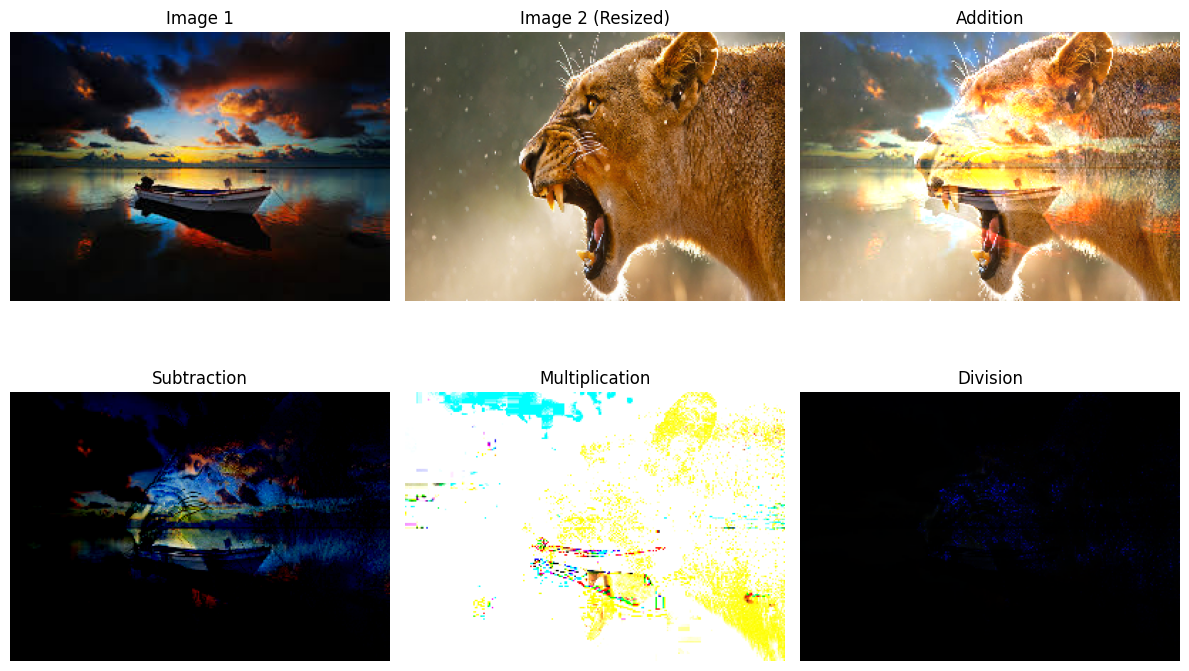

In [5]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Upload two images
uploaded = files.upload()

# Get the filenames
filenames = list(uploaded.keys())
print("Uploaded files:", filenames)

# Load images
img1 = cv2.imread(filenames[0])
img2 = cv2.imread(filenames[1])

# Convert from BGR → RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Resize img2 to match img1
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Arithmetic operations
addition = cv2.add(img1, img2)
subtraction = cv2.subtract(img1, img2)
multiplication = cv2.multiply(img1, img2)
division = cv2.divide(img1, img2 + 1)

# Show results
titles = ["Image 1", "Image 2 (Resized)", "Addition", "Subtraction", "Multiplication", "Division"]
images = [img1, img2, addition, subtraction, multiplication, division]

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


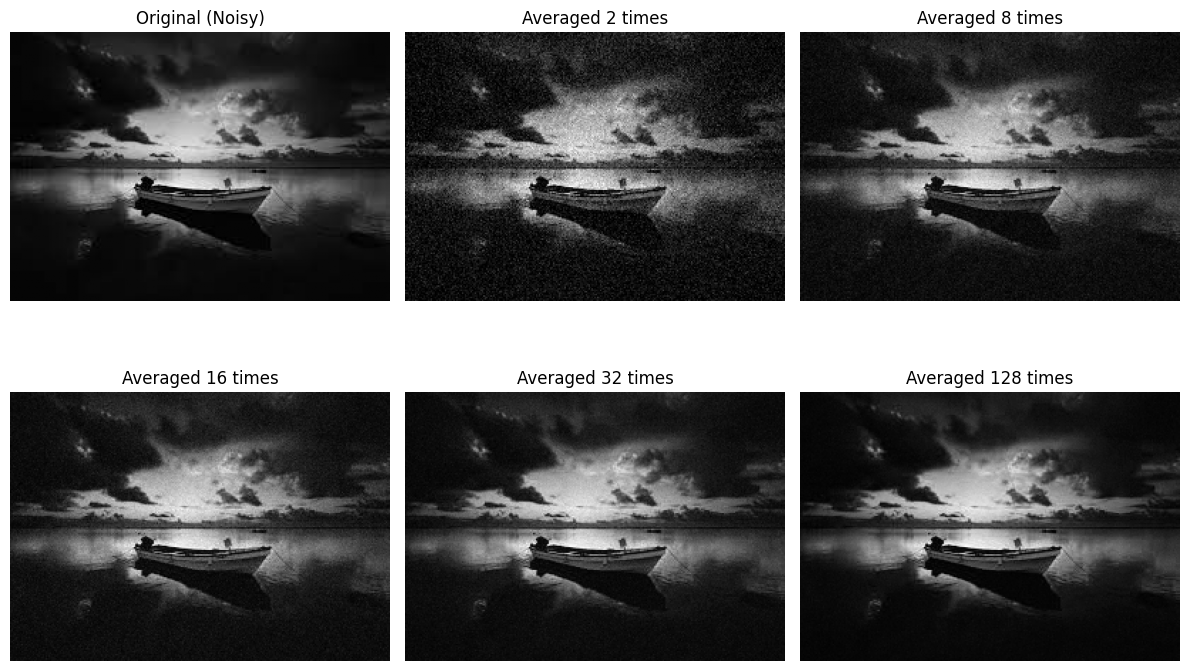

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load noisy image
img = cv2.imread('/content/boat.jpeg', cv2.IMREAD_GRAYSCALE)  # grayscale for clarity

# Function to average an image multiple times with added noise
def average_noise_reduction(image, num_samples):
    h, w = image.shape
    avg_img = np.zeros((h, w), np.float32)

    for i in range(num_samples):
        noisy = image + np.random.normal(0, 25, (h, w))  # add Gaussian noise
        noisy = np.clip(noisy, 0, 255)  # keep pixel values valid
        avg_img += noisy

    avg_img /= num_samples
    return avg_img.astype(np.uint8)

# Different sample sizes
sample_sizes = [2, 8, 16, 32, 128]
results = [average_noise_reduction(img, n) for n in sample_sizes]

# Display original + results
titles = ["Original (Noisy)"] + [f"Averaged {n} times" for n in sample_sizes]
images = [img] + results

plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


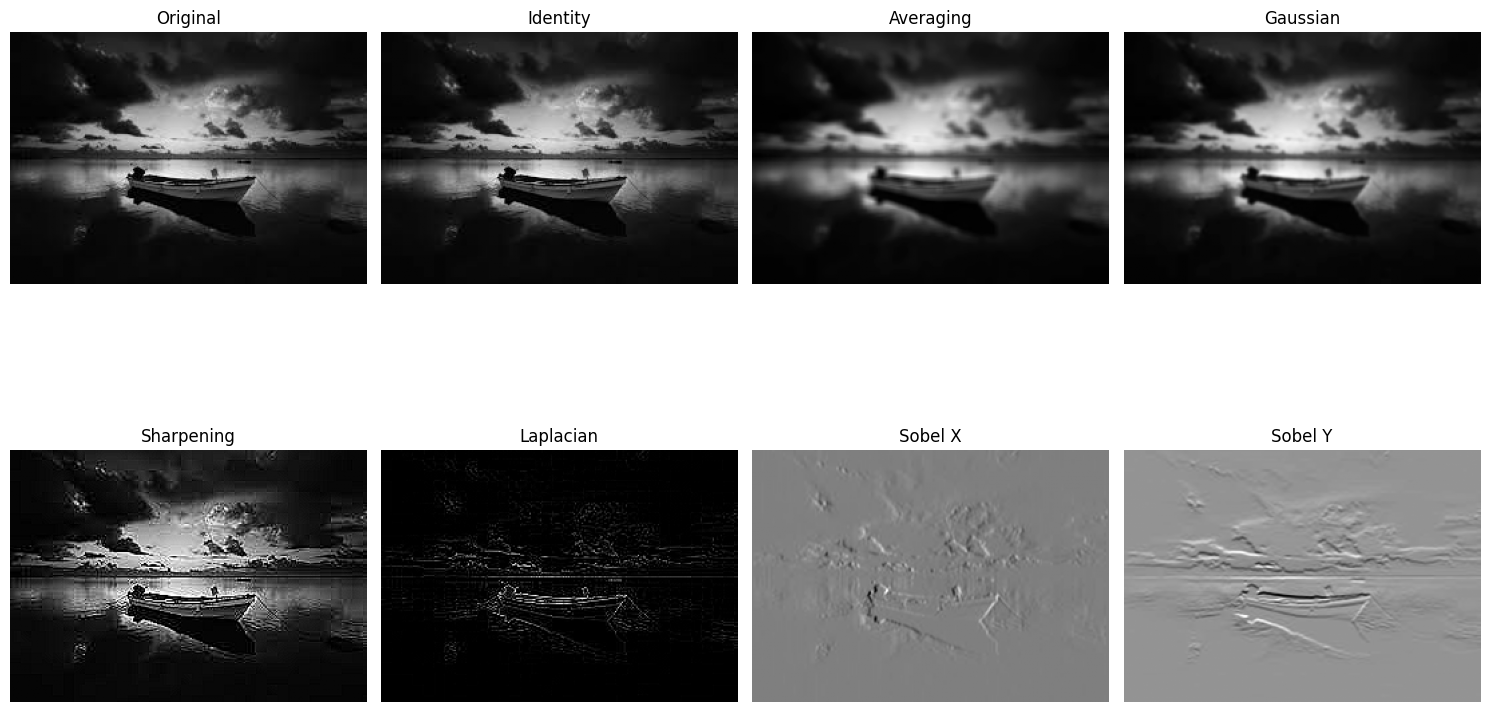

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (grayscale for simplicity)
img = cv2.imread('/content/boat.jpeg', cv2.IMREAD_GRAYSCALE)

# --- Filter functions ---

def apply_filter(image, kernel):
    """Generic function to apply a filter using convolution."""
    return cv2.filter2D(image, -1, kernel)

def identity_filter(image):
    kernel = np.array([[0, 0, 0],
                       [0, 1, 0],
                       [0, 0, 0]], dtype=np.float32)
    return apply_filter(image, kernel)

def averaging_filter(image, ksize=3):
    kernel = np.ones((ksize, ksize), np.float32) / (ksize * ksize)
    return apply_filter(image, kernel)

def gaussian_filter(image, ksize=5, sigma=1):
    return cv2.GaussianBlur(image, (ksize, ksize), sigma)

def sharpening_filter(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]], dtype=np.float32)
    return apply_filter(image, kernel)

def laplacian_filter(image):
    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]], dtype=np.float32)
    return apply_filter(image, kernel)

def sobel_filter(image, direction='x'):
    if direction == 'x':
        return cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    elif direction == 'y':
        return cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# --- Apply all filters ---
identity = identity_filter(img)
average = averaging_filter(img, 5)
gaussian = gaussian_filter(img, 5, 1)
sharpen = sharpening_filter(img)
laplace = laplacian_filter(img)
sobelx = sobel_filter(img, 'x')
sobely = sobel_filter(img, 'y')

# --- Show results ---
titles = ["Original", "Identity", "Averaging", "Gaussian",
          "Sharpening", "Laplacian", "Sobel X", "Sobel Y"]
images = [img, identity, average, gaussian, sharpen, laplace, sobelx, sobely]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


Saved 3x3 averaging kernel to kernel3.txt


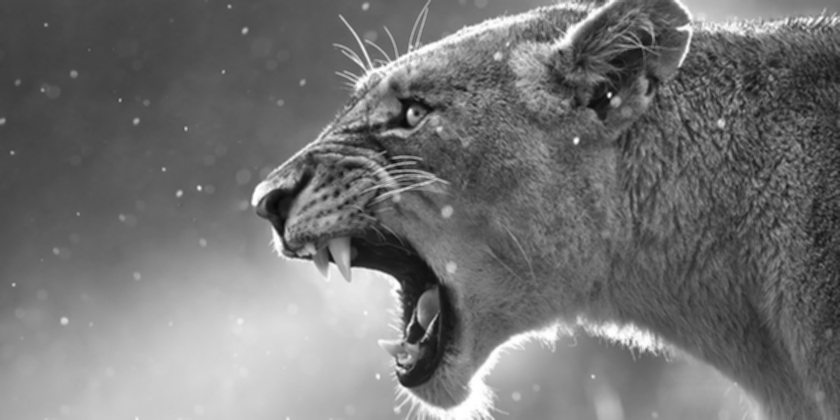

Saved 7x7 averaging kernel to kernel7.txt


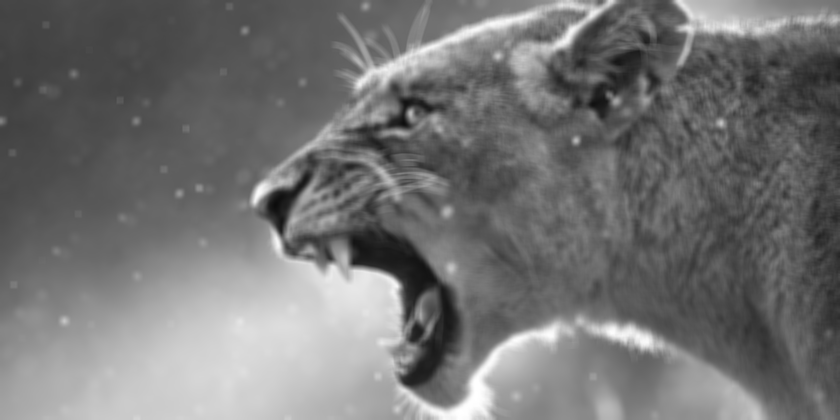

Saved 11x11 averaging kernel to kernel11.txt


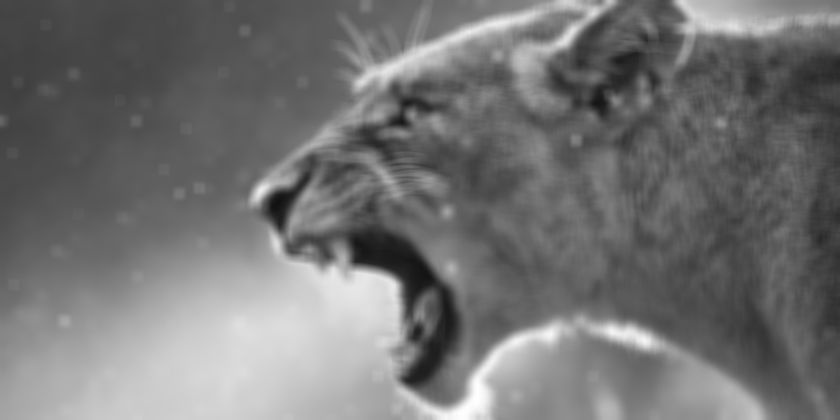

Original Image:


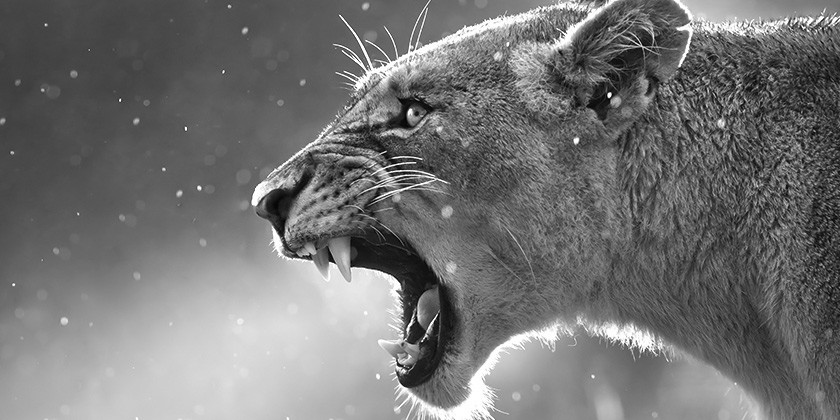

In [16]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def create_averaging_kernel(size):
    """Creates an averaging kernel of given size."""
    return np.ones((size, size), np.float32) / (size * size)

def save_kernel_to_file(kernel, filename):
    """Saves the kernel matrix to a text file."""
    np.savetxt(filename, kernel, fmt="%.5f")
    print(f"Saved {kernel.shape[0]}x{kernel.shape[1]} averaging kernel to {filename}")

def apply_filter(image, kernel_size):
    """Applies averaging filter of given size to the image."""
    kernel = create_averaging_kernel(kernel_size)
    return cv2.filter2D(image, -1, kernel)

def main():
    # Load an image (grayscale for clarity)
    image = cv2.imread("/content/tiger.jpg", cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Could not load image. Make sure 'sample.jpg' is in the working directory.")
        return

    # Kernel sizes
    kernel_sizes = [3, 7, 11]
    filtered_images = {}

    for size in kernel_sizes:
        kernel = create_averaging_kernel(size)
        save_kernel_to_file(kernel, f"kernel{size}.txt")

        filtered_image = apply_filter(image, size)
        filtered_images[size] = filtered_image

        # Show filtered image in Colab
        cv2_imshow(filtered_image)

    # Also show original
    print("Original Image:")
    cv2_imshow(image)

if __name__ == "__main__":
    main()


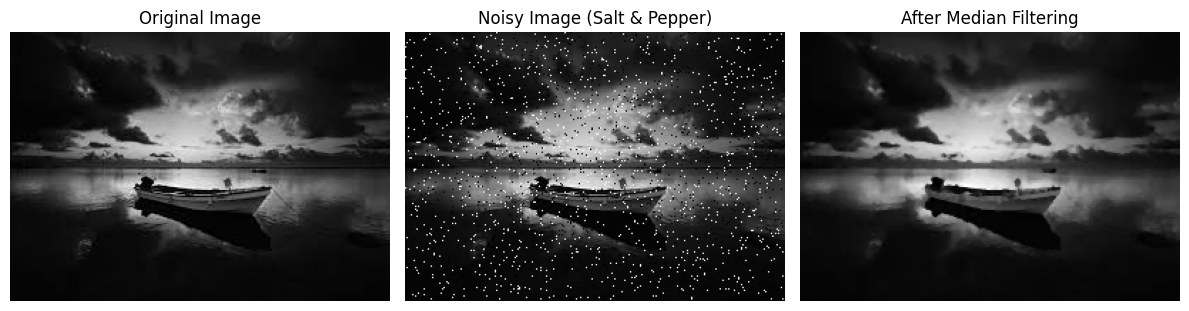

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (grayscale for clarity)
img = cv2.imread('/content/boat.jpeg', cv2.IMREAD_GRAYSCALE)

# --- Function to add Salt & Pepper noise ---
def add_salt_pepper_noise(image, prob=0.05):
    noisy = np.copy(image)
    total_pixels = image.size

    # Salt noise
    num_salt = int(prob * total_pixels / 2)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy[coords[0], coords[1]] = 255

    # Pepper noise
    num_pepper = int(prob * total_pixels / 2)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy[coords[0], coords[1]] = 0

    return noisy

# Add noise
noisy_img = add_salt_pepper_noise(img, prob=0.05)

# Apply median filter
median_filtered = cv2.medianBlur(noisy_img, 3)  # 3x3 median filter

# --- Show results ---
titles = ["Original Image", "Noisy Image (Salt & Pepper)", "After Median Filtering"]
images = [img, noisy_img, median_filtered]

plt.figure(figsize=(12, 6))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


Saving tiger.jpg to tiger (2).jpg


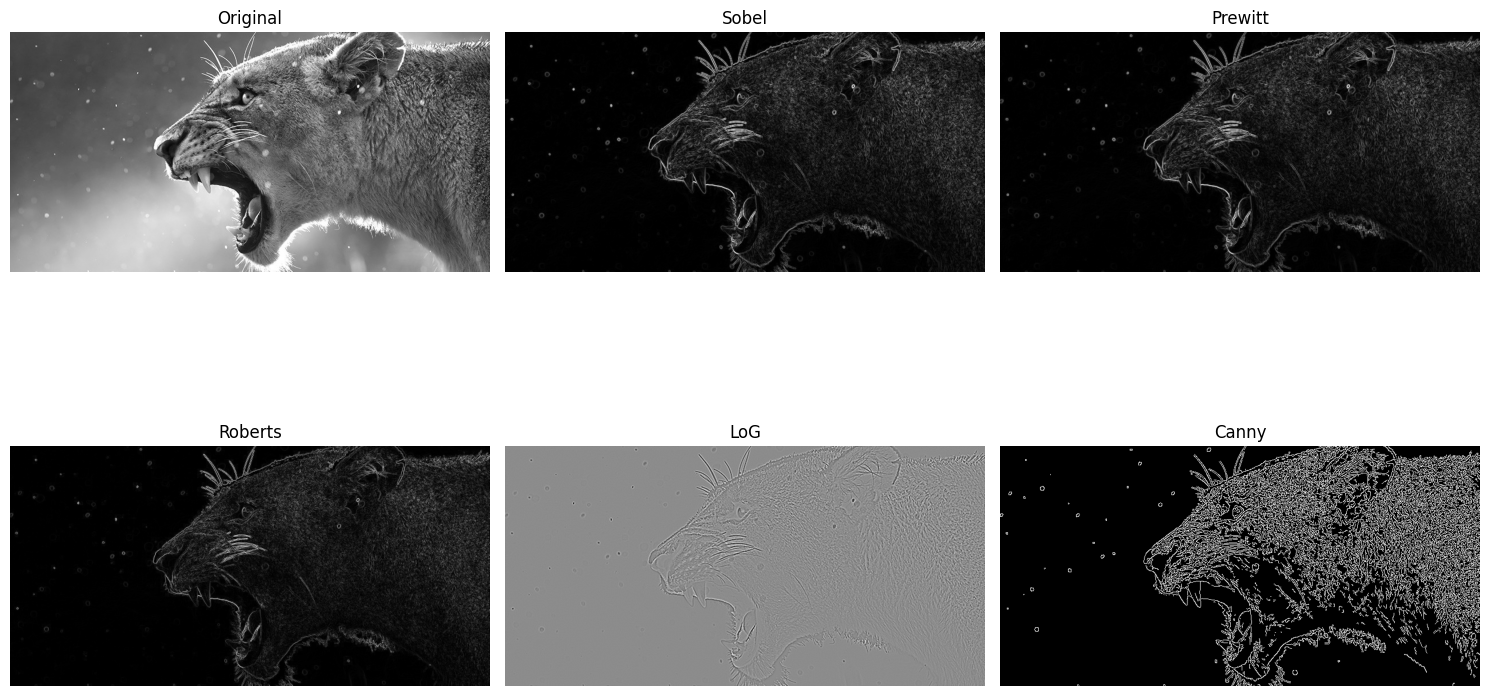

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import prewitt, roberts, sobel
from skimage import img_as_float

# Upload an image
from google.colab import files
uploaded = files.upload()

# Read image
for fn in uploaded.keys():
    img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)

# Convert to float
image = img_as_float(img)

# Sobel
edges_sobel = sobel(image)

# Prewitt
edges_prewitt = prewitt(image)

# Roberts
edges_roberts = roberts(image)

# Laplacian of Gaussian
blurred = cv2.GaussianBlur(img, (3,3), 0)
edges_log = cv2.Laplacian(blurred, cv2.CV_64F)

# Canny
edges_canny = cv2.Canny(img, 100, 200)

# Plot all results
titles = ['Original', 'Sobel', 'Prewitt', 'Roberts', 'LoG', 'Canny']
images = [img, edges_sobel, edges_prewitt, edges_roberts, edges_log, edges_canny]

plt.figure(figsize=(15,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
